## KNN
KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje supervisado utilizado para clasificación y regresión. Funciona encontrando los "k" vecinos más cercanos a una nueva instancia basándose en una medida de distancia, como la distancia euclidiana, y luego utiliza la clase mayoritaria o los valores promedio de los vecinos para clasificar o predecir la nueva instancia. La elección de "k" es importante, ya que afecta la sensibilidad al ruido.

In [220]:
# Importamos la biblioteca pandas para leer nuestros datos con el alias 'pd'
import pandas as pd

# Importamos la función train_test_split de sklearn.model_selection para dividir nuestros datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importamos el StandardScaler para normalizar los datos.
from sklearn.preprocessing import StandardScaler

# Importamos el clasificador KNN de sklearn.neighbors para la clasificación y la regresión
from sklearn.neighbors import KNeighborsClassifier

# Importamos las funciones classification_report y confusion_matrix de sklearn.metrics para evaluar la precisión del modelo y para visualizar los resultados de la clasificación
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score

from matplotlib import pyplot as plt

In [221]:
# Establecemos la ruta donde se encuentran los datos
path = "/home/"

In [222]:
# Importamos los datos utilizando pandas
df = pd.read_csv(path + "clientes.csv")

In [223]:
df.head()

,IdCliente,IdCiudad,Nombre,Apellido,FechaNacimiento,EstadoCivil,Genero,Email,IngresoAnual,TotalHijos,...,Ocupacion,Propietario,CantAutomoviles,Direccion,Telefono,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta
0,20887,206,Damien,Li,04/07/1966,S,M,damien2@mineriadedatos.com.ar,10000.0,4,...,Obrero,1,1,'2 route de Marseille','500 555-0159',13/05/2008,'0-1 Km.',Centro,46,1
1,29319,14,Alvin,Pal,14/07/1957,S,M,alvin34@mineriadedatos.com.ar,70000.0,1,...,'Obrero especializado',0,1,'5323 Stanford St','500 555-0127',03/11/2007,'0-1 Km.',Sur,55,1
2,20716,157,Kristina,Arun,13/09/1973,C,F,kristina7@mineriadedatos.com.ar,40000.0,1,...,'Obrero especializado',1,1,'Waldstr 29','500 555-0186',05/11/2006,'0-1 Km.',Centro,39,1
3,20381,627,Blake,Bennett,07/06/1938,C,M,blake49@mineriadedatos.com.ar,60000.0,3,...,Gestión,1,2,'7310 Heather Road',590-555-0124,02/05/2008,'10+ Km.',Norte,74,0
4,15013,329,Julia,Campbell,13/11/1976,S,F,julia6@mineriadedatos.com.ar,60000.0,0,...,'Obrero especializado',0,2,'6258 Stinson',606-555-0185,04/11/2007,'1-2 Km.',Norte,36,0


In [224]:
# Muestra la matriz de correlación entre las columnas numéricas del DataFrame df.
df.corr()

<ipython-input-224-26d557db11b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IdCliente,IdCiudad,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta
IdCliente,1.000000,-0.000123,-0.048255,0.002471,-0.125417,0.026091,-0.010823,0.007200
IdCiudad,-0.000123,1.000000,0.043773,0.061364,0.065481,-0.078792,0.080310,-0.085684
IngresoAnual,-0.048255,0.043773,1.000000,0.222296,0.044658,0.469289,0.153101,0.054093
TotalHijos,0.002471,0.061364,0.222296,1.000000,0.185421,0.272527,0.495425,-0.131266
Propietario,-0.125417,0.065481,0.044658,0.185421,1.000000,-0.054269,0.112114,0.020064
CantAutomoviles,0.026091,-0.078792,0.469289,0.272527,-0.054269,1.000000,0.169977,-0.183216
Edad,-0.010823,0.080310,0.153101,0.495425,0.112114,0.169977,1.000000,-0.101642
ComproBicicleta,0.007200,-0.085684,0.054093,-0.131266,0.020064,-0.183216,-0.101642,1.000000


Verificamos los nulos, y encontramos que el atributo IngresoAnual tenia 10 nulos, para evitar esto completamos los nulos con la media ya que la distribucion de la variable IngresoAnual sigue una distribucion bastante aproximada a la normal, y no encontramos valores anomalos significativos

In [225]:
c_igA_na = df["IngresoAnual"].isna()
df.loc[c_igA_na, "IngresoAnual"] = df.IngresoAnual.mean()

Transformamos el tipo de dato de los siguientes atributos para armar list_x con las variables numericas de nuestro interes

In [226]:
#df["ComproBicicleta"] = df["ComproBicicleta"].astype("bool")

list_x = ['CantAutomoviles','IngresoAnual','TotalHijos','Edad','Propietario']

In [227]:
scaler = StandardScaler()
scaler.fit(df[list_x])

X= scaler.transform(df[list_x])

Definicion de la variable a predecir

In [228]:
y = df.ComproBicicleta

Divisón de datos de prueba y test

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify = y)

Elección del parámetro K

In [249]:
for k in range(1,15,1):
  knn = KNeighborsClassifier(k, weights= "distance")
  knn.fit(X_train, y_train)
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
  print("_______________________________________")
  print(f"K igual a {k}: ")
  print(f'Accuracy de K-NN train: {knn.score(X_train, y_train):.2f}')
  print(f"F1 de K-NN train: {f1_score(y_train,pred_train, average='macro'):.2f}")
  print(f"Recall train: {recall_score(y_train, pred_train):.2f}%")
  print(f'Accuracy de K-NN test: {knn.score(X_test, y_test):.2f}')
  print(f"F1 de K-NN test: {f1_score(y_test, pred_test,average='macro'):.2f}")
  print(f"Recall test: {recall_score(y_test, pred_test):.2f}%")

_______________________________________
K igual a 1: 
Accuracy de K-NN train: 0.81
F1 de K-NN train: 0.80
Recall train: 0.76%
Accuracy de K-NN test: 0.68
F1 de K-NN test: 0.67
Recall test: 0.58%
_______________________________________
K igual a 2: 
Accuracy de K-NN train: 0.81
F1 de K-NN train: 0.79
Recall train: 0.61%
Accuracy de K-NN test: 0.70
F1 de K-NN test: 0.66
Recall test: 0.48%
_______________________________________
K igual a 3: 
Accuracy de K-NN train: 0.84
F1 de K-NN train: 0.83
Recall train: 0.77%
Accuracy de K-NN test: 0.72
F1 de K-NN test: 0.70
Recall test: 0.61%
_______________________________________
K igual a 4: 
Accuracy de K-NN train: 0.84
F1 de K-NN train: 0.83
Recall train: 0.69%
Accuracy de K-NN test: 0.72
F1 de K-NN test: 0.70
Recall test: 0.55%
_______________________________________
K igual a 5: 
Accuracy de K-NN train: 0.84
F1 de K-NN train: 0.83
Recall train: 0.75%
Accuracy de K-NN test: 0.73
F1 de K-NN test: 0.71
Recall test: 0.59%
_________________________

In [250]:
#Calculo del racall solamente para evaluar todos los modelos con la misma métrica. (De los que eran positivos, cuántos detectó?)
for k in range(1,20,1):
  knn = KNeighborsClassifier(k, weights= "distance")
  knn.fit(X_train, y_train)
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
  print("_______________________________________")
  print(f"K igual a {k}: ")
  print(f"Recall train: {recall_score(y_train, pred_train):.2f}%")
  print(f"Recall test: {recall_score(y_test, pred_test):.2f}%") #true positive / (true positive + false negative)

_______________________________________
K igual a 1: 
Recall train: 0.76%
Recall test: 0.58%
_______________________________________
K igual a 2: 
Recall train: 0.61%
Recall test: 0.48%
_______________________________________
K igual a 3: 
Recall train: 0.77%
Recall test: 0.61%
_______________________________________
K igual a 4: 
Recall train: 0.69%
Recall test: 0.55%
_______________________________________
K igual a 5: 
Recall train: 0.75%
Recall test: 0.59%
_______________________________________
K igual a 6: 
Recall train: 0.72%
Recall test: 0.56%
_______________________________________
K igual a 7: 
Recall train: 0.75%
Recall test: 0.58%
_______________________________________
K igual a 8: 
Recall train: 0.74%
Recall test: 0.58%
_______________________________________
K igual a 9: 
Recall train: 0.74%
Recall test: 0.58%
_______________________________________
K igual a 10: 
Recall train: 0.74%
Recall test: 0.58%
_______________________________________
K igual a 11: 
Recall train: 

Elegimos k=5 porque fue el valor óptimo de n_neighbors encontrado, donde el sobreajuste era menor y el accuracy fue el maximo encontrado.

In [251]:
  knn = KNeighborsClassifier(3, weights= "distance") #Elegimos k=3 pq tiene mayor recall
  knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [252]:
pred = knn.predict(X_test)

# Matriz de confusión

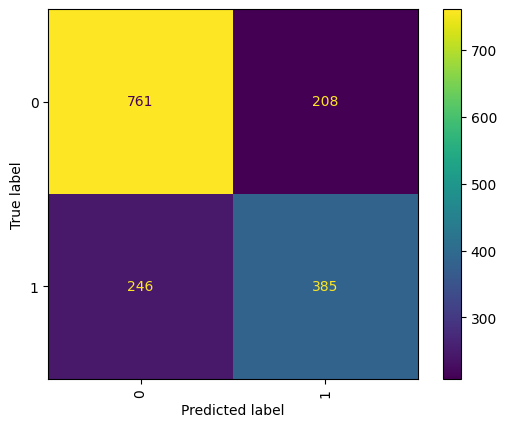

In [253]:
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
cm_display.plot()

plt.xticks(rotation=90)
plt.show()